In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorpac.utils import PSD

In [303]:
class subject:
    sf=160;
    montage = mne.channels.make_standard_montage('standard_1020')
    ch_map = {'Fc5': 'FC5',
              'Fc3': 'FC3',
              'Fc1': 'FC1',
              'Fcz': 'FCz',
              'Fc2': 'FC2',
              'Fc4': 'FC4',
              'Fc6': 'FC6',
              'Cp5': 'CP5',
              'Cp3': 'CP3',
              'Cp1': 'CP1',
              'Cpz': 'CPz',
              'Cp2': 'CP2',
              'Cp4': 'CP4',
              'Cp6': 'CP6',
              'Af7': 'AF7',
              'Af3': 'AF3',
              'Afz': 'AFz',
              'Af4': 'AF4',
              'Af8': 'AF8',
              'Ft7': 'FT7',
              'Ft8': 'FT8',
              'Tp7': 'TP7',
              'Tp8': 'TP8',
              'Po7': 'PO7',
              'Po3': 'PO3',
              'Poz': 'POz',
              'Po4': 'PO4',
              'Po8': 'PO8'}
    
    
    def __init__(self,sbj,rec):
        self.edf_loc = '/media/biraj/DATA/Motor Imagery Dataset/S'+sbj+'/S'+sbj+'R'+rec+'.edf'
        self.data = mne.io.read_raw_edf(self.edf_loc)
        self.data.rename_channels(lambda x: x.strip('.'))
        self.data.rename_channels(self.ch_map)
        self.data.set_montage(self.montage)
        self.events, self.event_id = mne.events_from_annotations(self.data)
        self.epochs = mne.Epochs(self.data, self.events, self.event_id, baseline=(None,None))
        self.info = self.data.info
       
        ### for the purpose of segmenting the data into T0 T1/T2 T0 format so as to include two resting period
        ### before and after the movement task
        self.onset = []
        self.duration = [4.1*3]*14
        self.description = []

        for i in range(len(self.events)-1):
            if self.events[i, 2] == 1:
                continue
            elif self.events[i, 2] == 2:
                print(self.events[i-1][0])
                self.onset.append(self.events[i-1][0])
                #self.duration.append(self.events[i+1][0]-self.events[i-1][0])
                self.description.append('T1')
                continue
            elif self.events[i, 2] == 3:
                print(self.events[i-1][0])
                self.onset.append(self.events[i-1][0])
                #self.duration.append(self.events[i+1][0]-self.events[i-1][0])
                self.description.append('T2')
                continue

    def rename_channels(self):
        print(self.data)
        
        
    def filter_data(self):
        ch_names = self.data.ch_names
        info = mne.create_info(self.data.ch_names, sfreq= self.sf,ch_types='eeg')
        self.data.plot_psd()
        arr = mne.filter.notch_filter(self.data.get_data(), Fs=self.sf, freqs = 60)
        self.data = mne.io.RawArray(arr, info)
        self.data.set_montage(self.montage)
        self.data.plot_psd()
        
    def segment_epochs(self):
        #if want== 1:
        #    self.onset = np.array(self.onset)/160
        #   self.duration = np.array(self.duration)/160
        #    self.my_ann = mne.Annotations(self.onset, self.duration, self.description)
        #    print(self.my_ann)
        #    self.data.set_annotations(self.my_ann)
        #    self.events, self.event_id=mne.events_from_annotations(self.data)
        #    self.epochs=mne.Epochs(self.data, self.events, event_id=self.event_id, tmin=0, tmax=12, baseline=(None,None))
        #elif want== 0:
            self.events, self.event_id=mne.events_from_annotations(self.data)
            self.epochs=mne.Epochs(self.data, self.events, event_id=self.event_id, tmin=0, tmax=12, baseline=(None,None))
        
    def calc_connectivity(self):
        self.fmin=4
        self.fmax=8
        
        self.how_many = 2
        self.eeg_data = self.data.get_data()
        print('ok')
        plv, freqs, times, n_epochs, n_tapers=mne.connectivity.spectral_connectivity(self.epochs,method='plv', 
                                                indices=None, mode='cwt_morlet', sfreq=self.info['sfreq'], 
                                                fmin=self.fmin, fmax=self.fmax, faverage=True, 
                                                cwt_freqs=np.linspace(self.fmin,self.fmax,self.how_many), 
                                                cwt_n_cycles=1, n_jobs=1)
        
    def calc_centrality():
        pass
        
     

In [304]:
sub1=subject('005','03')
sub1.info

Extracting EDF parameters from /media/biraj/DATA/Motor Imagery Dataset/S005/S005R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
30 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
0
1312
2624
3936
5248
6560
7872
9184
10496
11808
13120
14432
15744
17056


<Info | 8 non-empty values
 bads: []
 ch_names: FC5, FC3, FC1, FCz, FC2, FC4, FC6, C5, C3, C1, Cz, C2, C4, C6, ...
 chs: 64 EEG
 custom_ref_applied: False
 dig: 67 items (3 Cardinal, 64 EEG)
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
>

Effective window size : 12.800 (s)


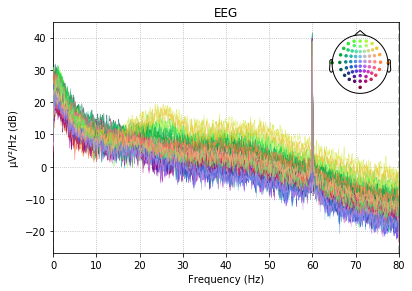

Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1057 samples (6.606 sec)

Creating RawArray with float64 data, n_channels=64, n_times=19680
    Range : 0 ... 19679 =      0.000 ...   122.994 secs
Ready.
Effective window size : 12.800 (s)


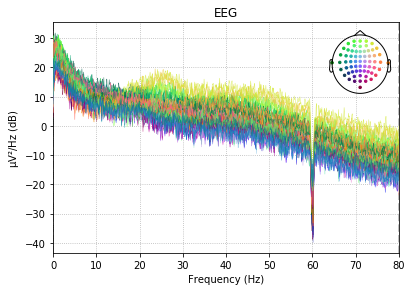

In [305]:
sub1.filter_data()

In [307]:
sub1.segment_epochs()
sub1.epochs


ValueError: max() arg is an empty sequence

In [255]:
T1=np.array(sub1.epochs['T1'].get_data())
T1.shape

Loading data for 7 events and 1921 original time points ...
0 bad epochs dropped


(7, 64, 1921)

In [256]:
from tensorpac import Pac

In [257]:
import matplotlib.pyplot as plt

In [258]:
import numpy as np

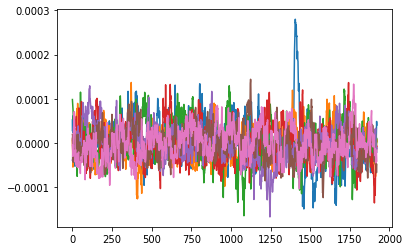

In [259]:
plt.plot(np.transpose(T1[:,20,:]))

In [260]:
n_epochs=7
n_times=1921
sf=160.

In [269]:
p= Pac(idpac=(2,0,0), f_pha=(4,7,1,1), f_amp=(8,40,1,1))
d1=T1[:,24,:];
d2=T1[:,13,:];
xpac12= p.filterfit(sf, d1, d2)
xpac21= p.filterfit(sf, d2, d1)
time=n_times

Phase Amplitude Coupling object defined
    extract phases (n_pha=2) and amplitudes (n_amps=31)
    true PAC estimation using Modulation Index (MI, Tort et al. 2010)
    extract phases (n_pha=2) and amplitudes (n_amps=31)
    true PAC estimation using Modulation Index (MI, Tort et al. 2010)


Compute PSD over 7 trials and 1921 time points
    Add 95th confidence interval


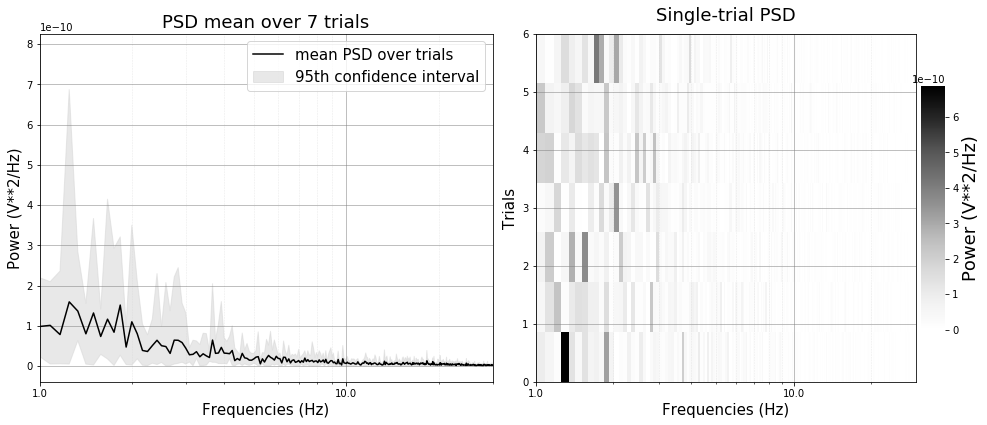

In [273]:
psd = PSD(T1[:,13,:], sf)
plt.figure(figsize=(14, 6))
# adding the mean PSD over trials
plt.subplot(1, 2, 1)
ax = psd.plot(confidence=95, f_min=1, f_max=30, log=True, grid=True)

# adding the single trial PSD
plt.subplot(1, 2, 2)
psd.plot_st_psd(cmap='Greys', f_min=1, f_max=30, log=True,
                grid=True)

plt.tight_layout()
plt.show()

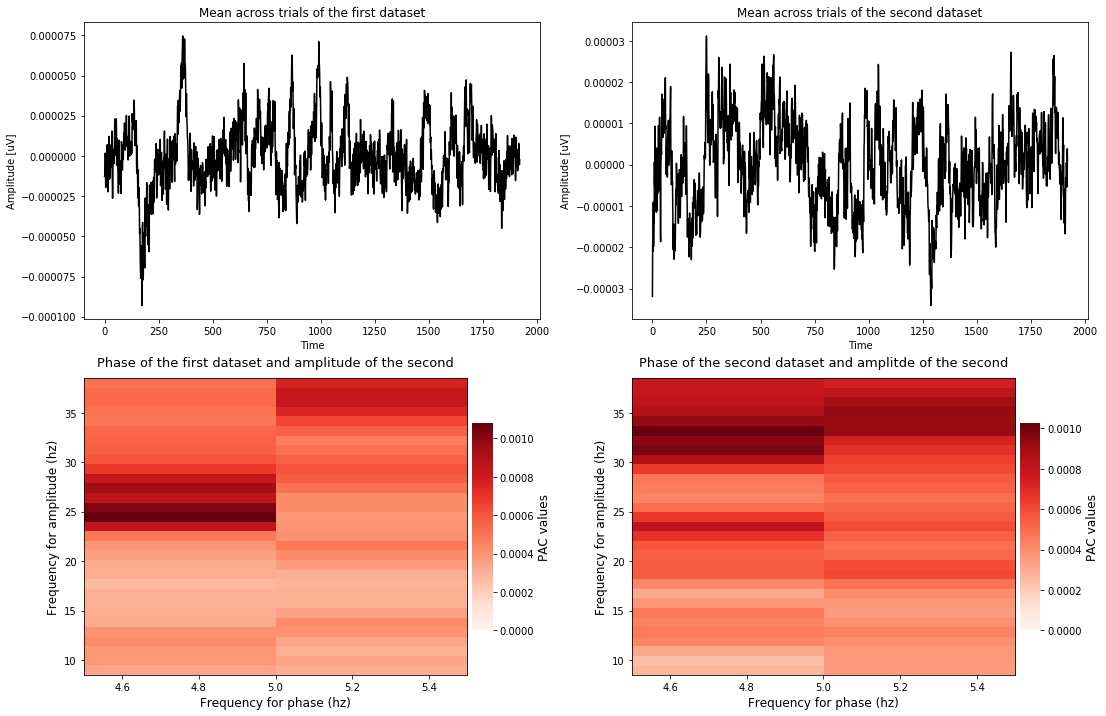

In [271]:
plt.figure(figsize=(18, 12))
plt.subplot(2, 2, 1)
plt.plot(d1.mean(0), color='k')
plt.xlabel('Time')
plt.ylabel('Amplitude [uV]')
plt.title('Mean across trials of the first dataset')
plt.axis('tight')

plt.subplot(2, 2, 2)
plt.plot(d2.mean(0), color='k')
plt.xlabel('Time')
plt.ylabel('Amplitude [uV]')
plt.title('Mean across trials of the second dataset')
plt.axis('tight')

plt.subplot(2, 2, 3)
p.comodulogram(xpac12.mean(-1), title="Phase of the first dataset and "
               "amplitude of the second", cmap='Reds')

plt.subplot(2, 2, 4)
p.comodulogram(xpac21.mean(-1), title="Phase of the second dataset and "
               "amplitde of the second", cmap='Reds')
plt.show()

In [264]:
p.comodulogram(xpac.mean(-1), cmap='Spectral_r', plotas='contour', ncontours=5)
p.show()

NameError: name 'xpac' is not defined

In [265]:
import os
import urllib

import numpy as np
from scipy.io import loadmat

from tensorpac import Pac, EventRelatedPac, PreferredPhase
from tensorpac.utils import PeakLockedTF, PSD, ITC, BinAmplitude

import matplotlib.pyplot as plt

In [266]:
itc = ITC(T1[:,22,:], sf, f_pha=(4, 8, 1, .2))


Inter-Trials Coherence (ITC)
    extracting 15 phases


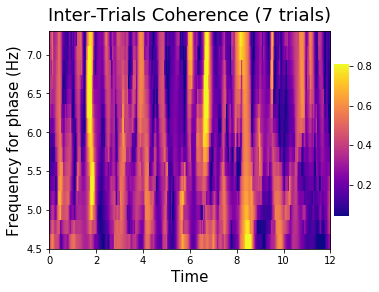

In [267]:
itc.plot(times=1921, cmap='plasma', fz_labels=15, fz_title=18)
plt.show()